# Exploratory Data Analysis

The dataset contains information about subscribers to a health insurance service and the charges they pay as insurance premium. We want to look into this dataset for relationships among the information in the dataset and/or between the subscribers information and the insurance charges.

## 1.0 Import Libraries

In [1]:
print ('Loading libraries ...')
import pandas as pd
import eda_utils as eu

Loading libraries ...


## 2.0 Import the dataset
The dataset is imported from a csv file in the root folder for this project. 

In [2]:
print('Importing dataset ...')
data = pd.read_csv('insurance.csv')

Importing dataset ...


## 3.0 Check Data
Let's look at some of features of the dataset.

How our data is set out? Let's take a look at the first few rows in the dataset to have an idea of the dataset we are working with.

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The next step is to check for duplicates in the data. Drop the duplicates if any is found.

In [4]:
print(data.duplicated().sum())

1


In [5]:
data.loc[data.duplicated(keep=False), :]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


There is only one duplicate row in the dataset. Let's go ahead to delete the row.

In [6]:
data=data.drop_duplicates().reset_index(drop=True)

We will look at some general information about the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


The data has 1337 rows and 7 columns. The 'sex', 'smoker' and region columns are contain categorical data types, the other columns are numerical. There are no null values in the dataset.

Next, we will look at some statistical measurements of the numerical data types in the dataset. We can have a fair idea of the range, the intern quartile range and the mean of the numerical columns.

In [8]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


We will at this stage define our input variables and our target variable.

In [9]:
data_columns = data.columns
input_variables = data.drop('charges', axis=1).columns
target_variable = data.drop(input_variables, axis=1).columns
input_variables = ', '.join(list(input_variables))
target_variable = ', '.join(list(target_variable))
print(f'The input variables are: {input_variables}.')
print(f'The target variable is: {target_variable}.')

The input variables are: age, sex, bmi, children, smoker, region.
The target variable is: charges


## 4.0 Analyzing the Data
We will aggregate the bmi values into three categories for an additional dimension to our analysis.

Create a new column to aggregate the bmi values

In [8]:
data['bmi_level'] = data['bmi'].apply(
    lambda x: 'high' if x > 28
    else ('medium' if 25<x<28 else 'low') 
)

Let's see how our new dataset looks.

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_level
0,19,female,27.900,0,yes,southwest,16884.92400,medium
1,18,male,33.770,1,no,southeast,1725.55230,high
2,28,male,33.000,3,no,southeast,4449.46200,high
3,33,male,22.705,0,no,northwest,21984.47061,low
4,32,male,28.880,0,no,northwest,3866.85520,high


### 4.1 Frequency Distribution Plots
We can now look at the frequency distribution of the numerical variables in our data to determine the skewness of our data.

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64


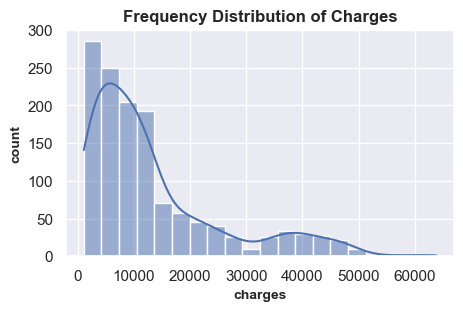

In [11]:
# analyzing charges
print(data['charges'].describe())
eu.freq_distr_plot(data, 'charges')

There are obvious outliers in the right end of this frequency distribution plot. We can also infer this from the statistical descriptive for the 'charges' column.

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


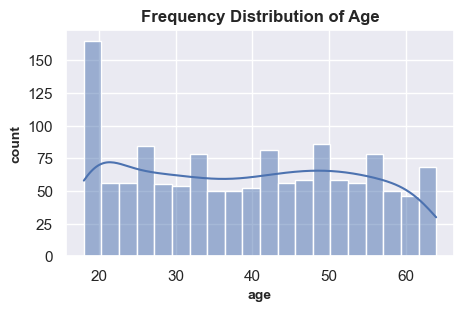

In [12]:
# analyzing age
print(data['age'].describe())
eu.freq_distr_plot(data, 'age')

There seem to be a fair distribution of the age feature in that there is no dominant age range in the dataset

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64


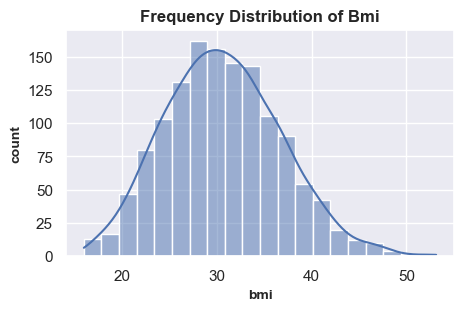

In [13]:
# analyzing bmi
print(data['bmi'].describe())
eu.freq_distr_plot(data, 'bmi')

The bmi attribute, to a great extent, can be described as a normally distributed variable.

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


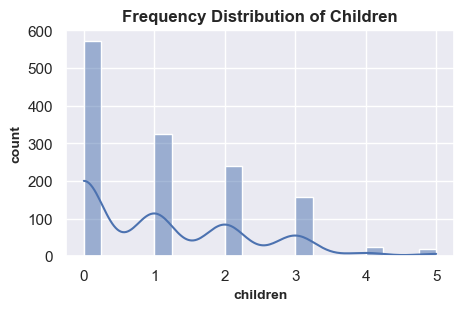

In [14]:
# analyzing children
print(data['children'].describe())
eu.freq_distr_plot(data, 'children')

### 4.2 Scatter Plots
Let's investigate the data and try to establish some patterns in the data and some relationships between the variable if any exists.

First, we will start off with looking at charges and age.

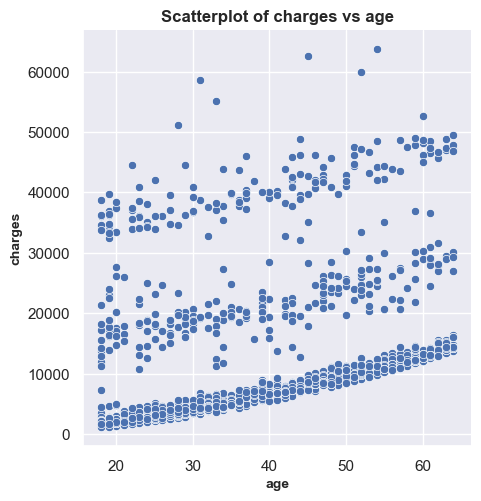

In [15]:
eu.data_scatter_plot(data, 'charges', 'age')

It is clear there is some relationship between age and charges, however it seems there are different categories from this plot. Let's investigate what could be responsible for the different categories.

First, let's test with the sex attribute.

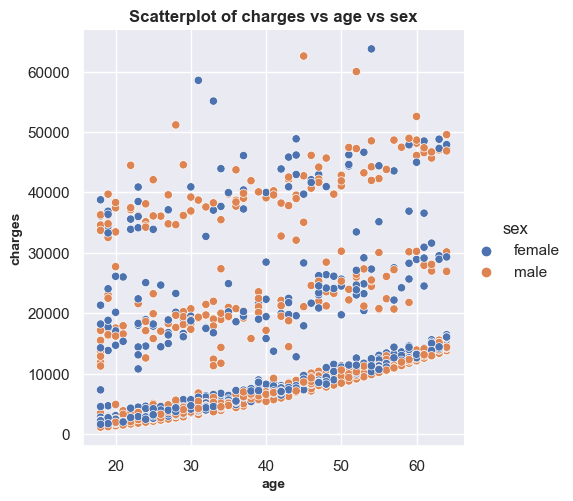

In [16]:
eu.data_scatter_plot(data, 'charges', 'age', 'sex')

There is a mixture of both sexes in the three catgories from the plot.

Next, we test with the smoker attribute.

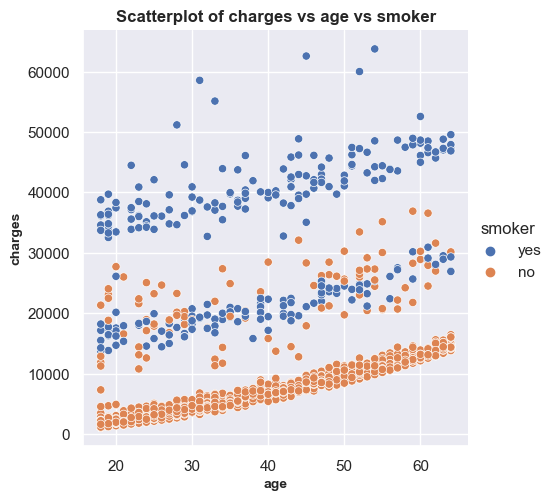

In [17]:
eu.data_scatter_plot(data, 'charges', 'age', 'smoker')

We can see some uniformity in the three categories from the plot. One catgory has mostly non smokers, the second has mostly smokers and the third has both smokers and non smokers.

We will continue with our test by looking at  the 'region' attribute.

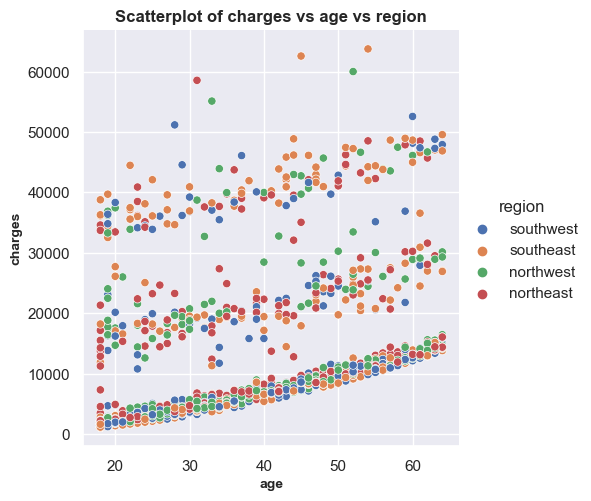

In [16]:
eu.data_scatter_plot(data, 'charges', 'age', 'region')

The region attribute does not provide any clear segmentations in the three identified categories.

Our next test will be with the new column we added to the original dataset: 'bmi_level'.

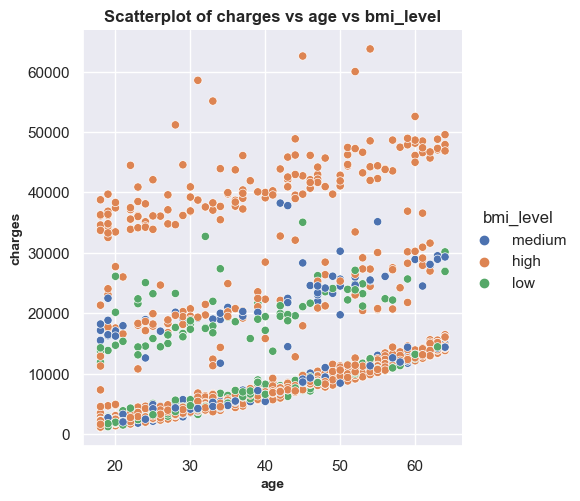

In [18]:
eu.data_scatter_plot(data, 'charges', 'age', 'bmi_level')

The bmi_level attribute gives us some information with respect to the bmi_level associated with the charges label. Almost all the charges above 30,000 is associated with high bmi_level.

There is no other attribute that defines the three categories identified in the data like the 'smoker' attribute. 

From this point, we will add the other attributes to the smoker attribute and check if we can further catgorized the data beyond the already identified ones. We start off this section of our analysis with the bmi_level attribute.

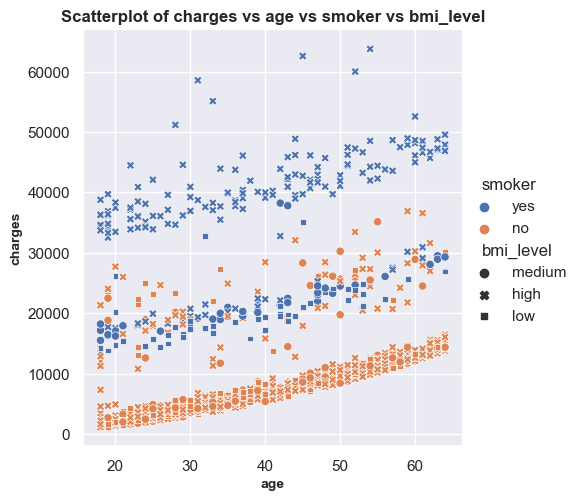

In [19]:
eu.data_scatter_plot(data, 'charges', 'age', 'smoker', 'bmi_level')

Let's use the smoker attribute and the bmi_level attribute to find other interesting relationships in the identified categories. From this plot we can see that almost all high charges are associated with high bmi_level and smoker. We can also establish that lower charges are associated with mostly non smoker and all classes of bmi_level and age attributes.

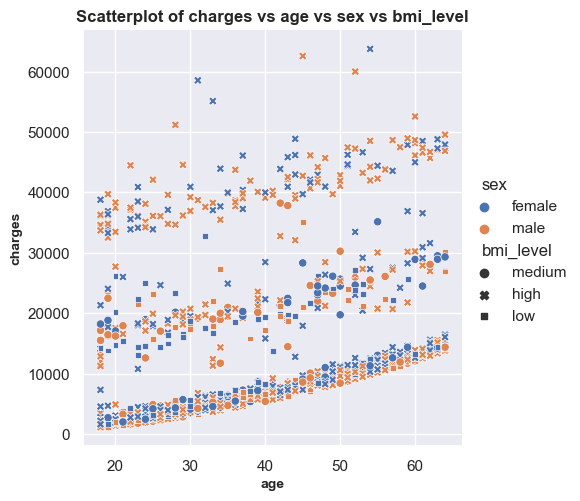

In [20]:
eu.data_scatter_plot(data, 'charges', 'age', 'sex', 'bmi_level')

We however cannot establish a similar relationship is we substitute the smoker attribute with the sex attribute. Though we can see that higher charges are associated with high bmi_level, the sex attribute cannot be used to distinguish the categories in any way.

Outliers

From the frequency distribution of the charges attirbute, we observed there are low occuring high charges in the frequency plot. We can analyze these outliers to establish what are the contributory factors to these high charges.

First, we need to establish a cut off for the outliers. For the sake of this analysis, our cut off will be the 80th quantile of the charges attribute.

In [21]:
data.charges.quantile(0.8)

20269.216957999997

We can extract a dataframe based on the charges above the 80th quantile and 

In [22]:
data_80th_q = data[data['charges']>data.charges.quantile(0.8)]
data_80th_q.reset_index()
data_80th_q.describe()

,age,bmi,children,charges
count,268.000000,268.000000,268.000000,268.000000
mean,42.667910,32.221194,1.145522,34243.269119
std,13.868219,5.726242,1.127333,9531.302451
min,18.000000,17.765000,0.000000,20277.807510
25%,31.000000,27.822500,0.000000,25040.131092
50%,45.000000,32.062500,1.000000,34833.763500
75%,54.000000,36.122500,2.000000,41238.271812
max,64.000000,52.580000,4.000000,63770.428010


The charges on this dataset for obvious reasons are the highest from the main dataset. However, the other numerical attributes do not follow the same pattern. Do these attributes follow the same pattern as we saw with the main dataset? Let's check that out. 

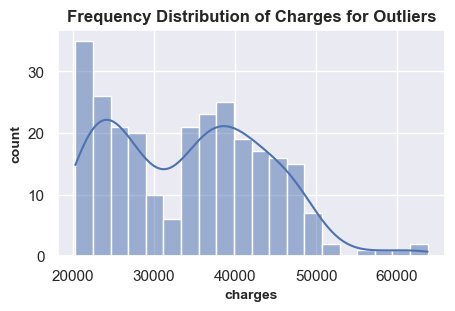

In [23]:
eu.freq_distr_plot(data_80th_q, 'charges', Outliers=True)

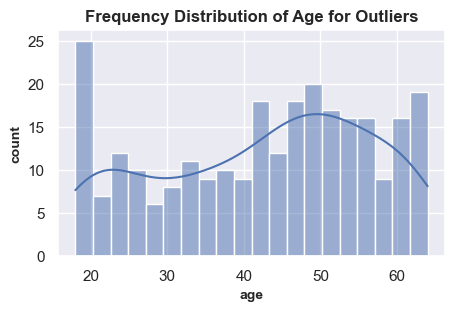

In [24]:
eu.freq_distr_plot(data_80th_q, 'age', Outliers=True)

Just like we saw in the general dataset, there is no dominant age among the ages in the outliers. In other words, the high charges are not peculiar to any age or age group. 

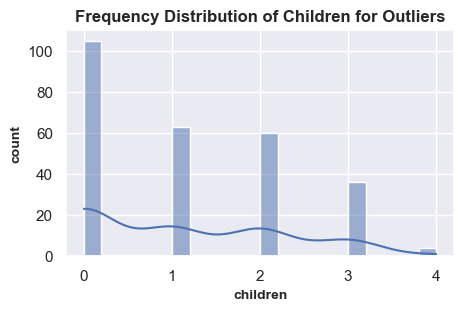

In [25]:
eu.freq_distr_plot(data_80th_q, 'children', Outliers=True)

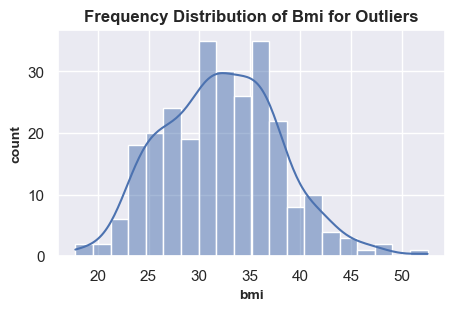

In [26]:
eu.freq_distr_plot(data_80th_q, 'bmi', Outliers=True)

We also find that there is no bmi value(s) that is dominant in the outliers.

So we have established that we can not associate the outliers (higher premium charges) with bmi levels or age. Let's see if smoker, sex and children attributes can be used to understand what contributes to the high charges.

First, we investigate the age attributes to see if we can find any segmentation like we did with the general dataset.

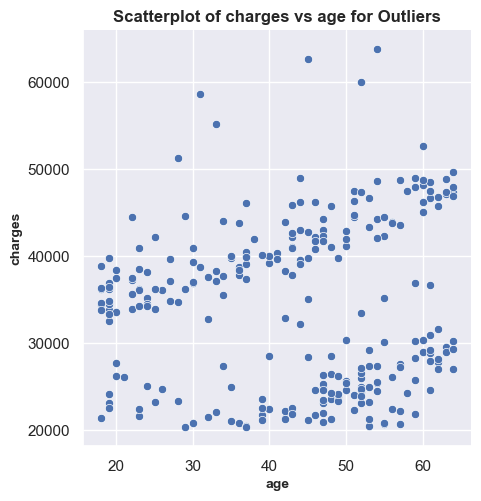

In [27]:
eu.data_scatter_plot(data_80th_q, 'charges', 'age', Outliers=True)

The outliers do not foloow the general dataset in this analysis. As seen in the plot, two clusters of values are visible, whereas for the general dataset, we see three distinct clusters.

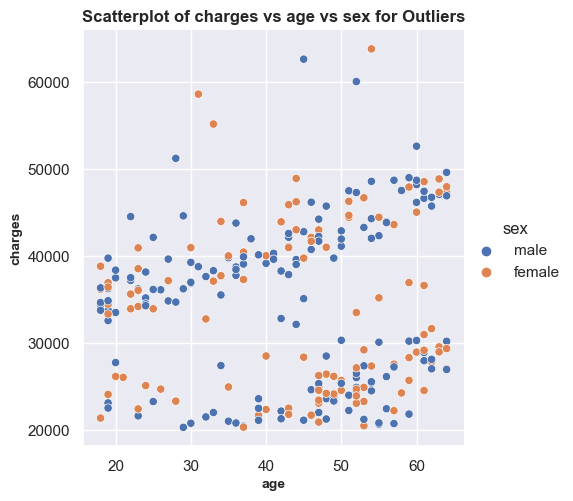

In [28]:
eu.data_scatter_plot(
    data_80th_q, 'charges', 'age', 'sex', Outliers=True
)

Let's test the dataset with the sex attribute to establish if this attribute is responsible for the two clusters we have in the outliers scatter plot. The plot above shows that the sex attribute does not separate the dataset into the clusters we observed in the earlier scatter plot.

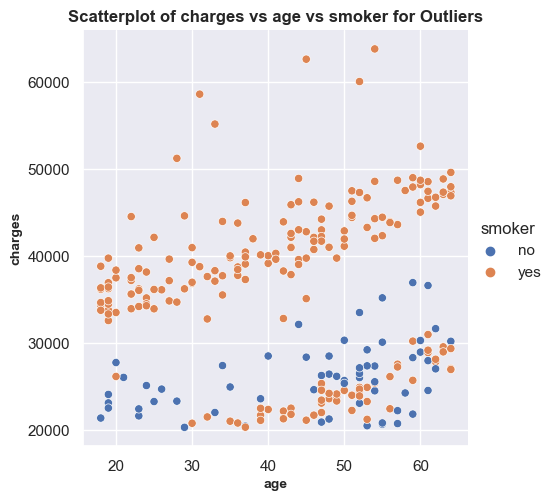

In [29]:
eu.data_scatter_plot(
    data_80th_q, 'charges', 'age', 'smoker', Outliers=True
)

With the smoker attribute we find that the upper cluster is clearly associated with smokers while the lower cluster has a mix of smokers and non smokers. There is a further split in the lower cluster. We can observe that the younger ages in the lower cluster are non smokers while the older ages have a blend of smokers and non smokers.

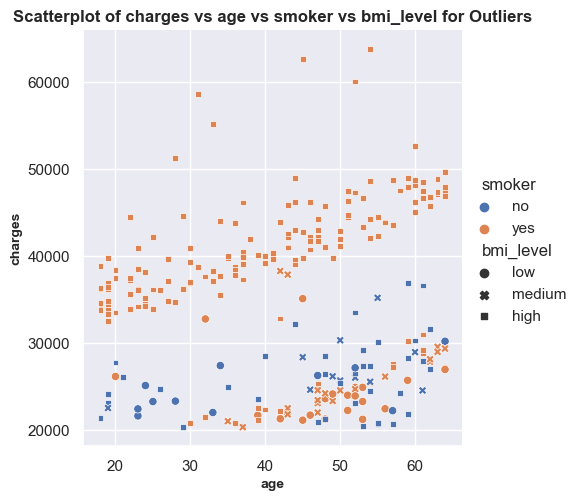

In [30]:
eu.data_scatter_plot(
    data_80th_q, 'charges', 'age', 'smoker', 'bmi_level', Outliers=True
)

Let us add the bmi_level attribute to investigate how the observation from the previous plot responds elaborates the clusters. We can see that the the upper cluster is mostly associated with smokers who have high bmi_level. There is no clear association of any of the bmi_levels with smokers or non-smokers in the lower cluster.

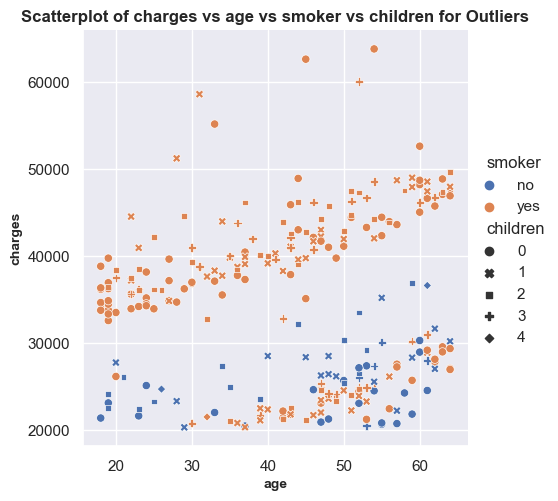

In [31]:
eu.data_scatter_plot(
    data_80th_q, 'charges', 'age', 'smoker', 'children', Outliers=True
)

We substitute the bmi_levels with the children attribute and we can observe no clear association between any of the clusters and the number of children.

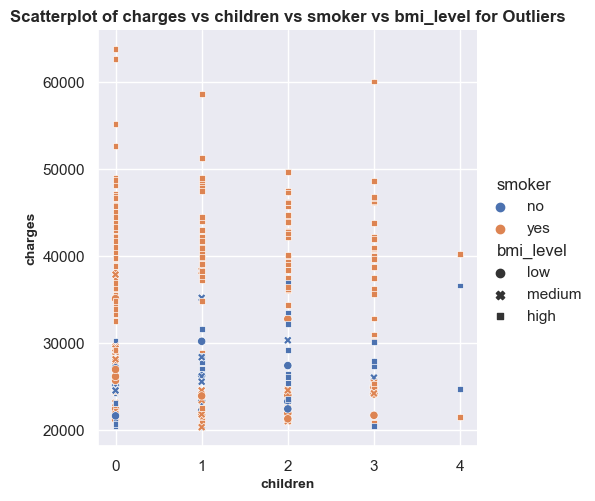

In [32]:
eu.data_scatter_plot(
    data_80th_q, 'charges', 'children', 'smoker', 'bmi_level', Outliers=True
)

We can observe from this plot that increasing the number of children is likely associated with the bmi level. We can also see that the higher charges in the outliers  are mostly associated with smokers who have high bmi level.

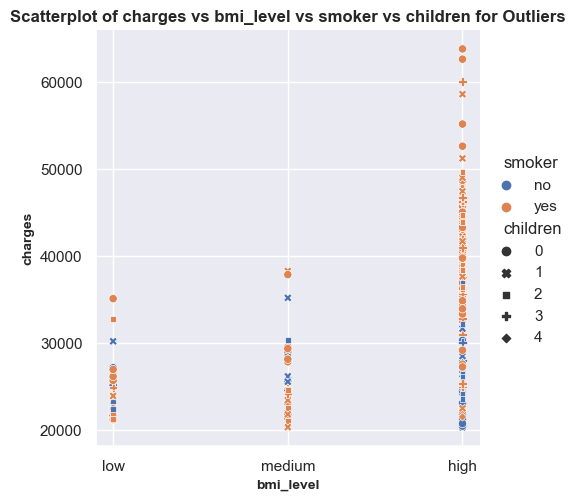

In [33]:
eu.data_scatter_plot(
    data_80th_q, 'charges', 'bmi_level', 'smoker', 'children', Outliers=True
)

Swapping the number of children and the bmi_level attributes in the previous plot, we can observe that the high bmi_level class dominates the outliers dataset. However, there is no indication of any association between the number of children and the bmi level as seen earlier in this notebook.

Average Charges Analysis

We would use the averages charges of the groups in the dataset to simplify the comparison between the groups. Since we do not know in clear terms if the distribution of the dataset is similar to that in the reral world, using frequency of occurrence may give misleading results.

Our first comparison is that between male and female in the dataset.What is the charge for an average man versus an average woman?

In [34]:
result1=eu.grouped_data(data, 'charges', 'sex')
result1

,sex,avg_charges
0,female,12569.58
1,male,13975.00


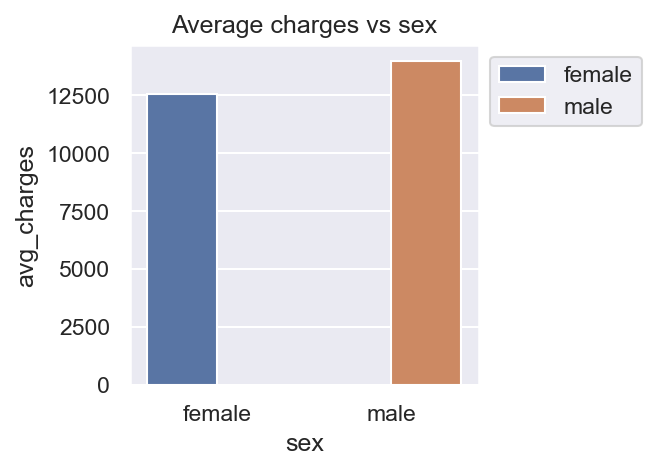

In [35]:
eu.avg_charges_barplot(result1)

As far as our dataset goes, a typical male pays more charges than a typical female.

Next, we group the sexes by the 'smoker' attribute. How is the average charges for a female smoker different from a female non-smoker?

In [36]:
result2=eu.grouped_data(data, 'charges', 'sex', 'smoker')
result2

,sex,smoker,avg_charges
0,female,no,8762.30
1,female,yes,30679.00
2,male,no,8099.70
3,male,yes,33042.01


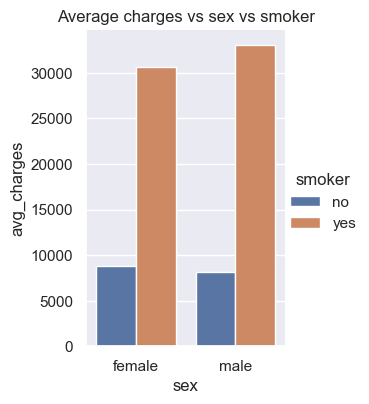

In [37]:
eu.avg_charges_catplot(result2)

As expected, the male and female smokers pay more charges on average than their non smoking counterparts. However, we can notice that whereas the average female non-smoker pays slightly more than the average male non-smoker, a female smoker pays less than a male smoker when we compare their average charges.

Now, we can look at grouping the sexes with their bmi levels.

In [38]:
result3=eu.grouped_data(data, 'charges', 'sex', 'bmi_level')
result3

,sex,bmi_level,avg_charges
0,female,high,13360.30
1,female,low,10901.18
2,female,medium,11637.54
3,male,high,15846.02
4,male,low,9694.09
5,male,medium,10673.04


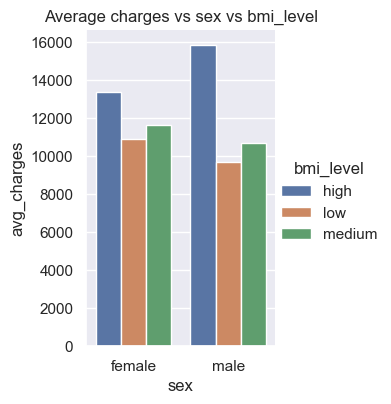

In [39]:
eu.avg_charges_catplot(result3)

As expected, the plot shows that charges increases as the bmi level increases for both sexes. We can see from this plot that males with high bmi levels pay higher charges than females with similar bmi levels. We also notice that females with medium and low bmi levels pay more than the males in the same bmi categories.

Our last comaparison groups will look at a combination of sexes, smoker and bmi_level attributes.

In [40]:
result4=eu.grouped_data(data, 'charges', 'sex', 'smoker', 'bmi_level')
result4

,sex,smoker,bmi_level,avg_charges
0,female,no,high,8822.40
1,female,no,low,8111.95
2,female,no,medium,9236.00
3,female,yes,high,38714.90
4,female,yes,low,19704.71
5,female,yes,medium,22924.74
6,male,no,high,8508.59
7,male,no,low,6989.57
8,male,no,medium,7668.61
9,male,yes,high,37923.24


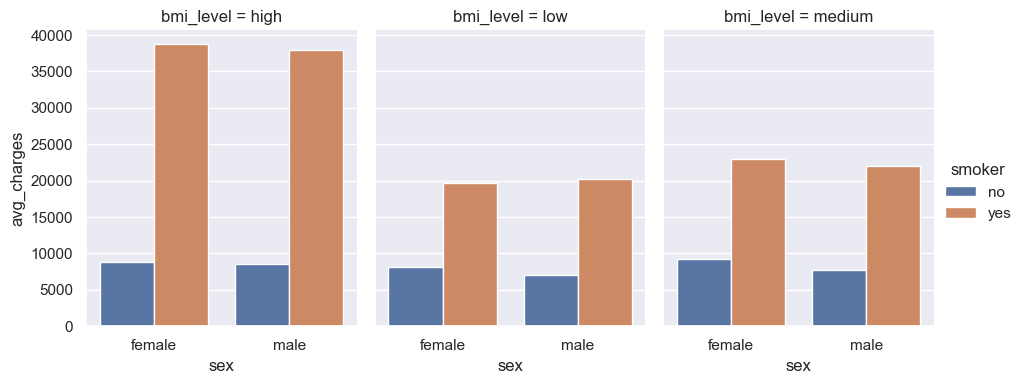

In [41]:
eu.avg_charges_catplot(result4)

The plot here shows that the average charges for males and females in the same group are reasonably close. The average for a male smoker with high bmi level is quite close to that of a woman with the same features. 

We also notice that the charges for non smokers is not highly influenced by the bmi level like it does for the smokers in our dataset.

We can also apply the average analysis to our 'outliers' and see if there are some patterns to the groups we have recognized in this section of our dataset. 

In [42]:
outliers_result1=eu.grouped_data(data_80th_q, 'charges', 'sex')
outliers_result1

,sex,avg_charges
0,female,33518.78
1,male,34763.41


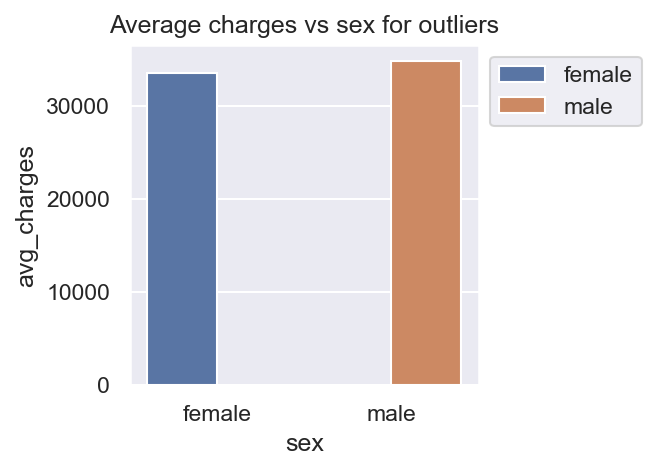

In [43]:
eu.avg_charges_barplot(outliers_result1, outliers=True)

The difference between the average charges for male and female is fairly negligible. This behaviour is different that of the entire dataset as observed earlier.

In [44]:
outliers_result2=eu.grouped_data(data_80th_q, 'charges', 'sex', 'smoker')
outliers_result2

,sex,smoker,avg_charges
0,female,no,26764.03
1,female,yes,35990.03
2,male,no,25098.01
3,male,yes,37064.70


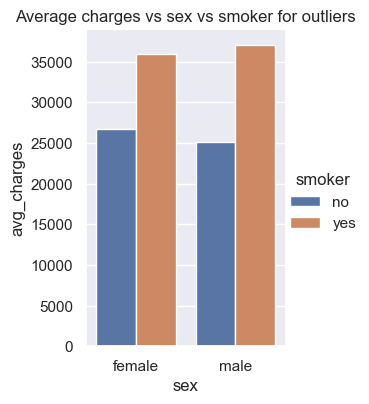

In [45]:
eu.avg_charges_catplot(outliers_result2, outliers=True)

The difference in average charges for smokers and non-smokers in the outliers data is a lot less than the difference observed in the same category for the general dataset. The Nevertheless, there is no significant difference between the average charges for female non smokers and for male non-smokers. The same can be said for female smokers and male smokers. This behaviour follows the pattern observed in the general dataset for this data category. Smokers pay higher charges than non-smokers even among the outliers.

In [46]:
outliers_result3=eu.grouped_data(data_80th_q, 'charges', 'sex', 'bmi_level')

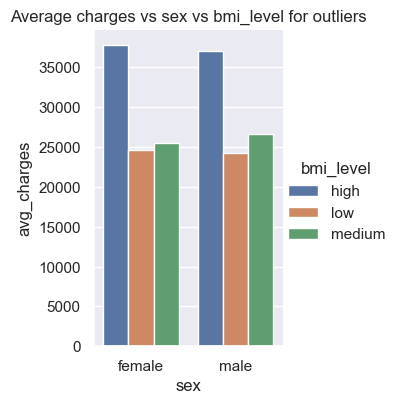

In [47]:
eu.avg_charges_catplot(outliers_result3, outliers=True)

In this category of our general dataset, we see that the difference between males with any of the bmi_level and females with the same bmi_level is not significant. We can infer that the charges are influenced by the bmi level regardless of the sex of the individual.

In [48]:
outliers_result4=eu.grouped_data(data_80th_q, 'charges', 'sex', 'smoker', 'bmi_level')
outliers_result4

,sex,smoker,bmi_level,avg_charges
0,female,no,high,27104.10
1,female,no,low,24385.58
2,female,no,medium,28122.25
3,female,yes,high,41261.09
4,female,yes,low,24809.76
5,female,yes,medium,24510.28
6,male,no,high,24984.25
7,male,no,low,24872.77
8,male,no,medium,25778.26
9,male,yes,high,39392.42


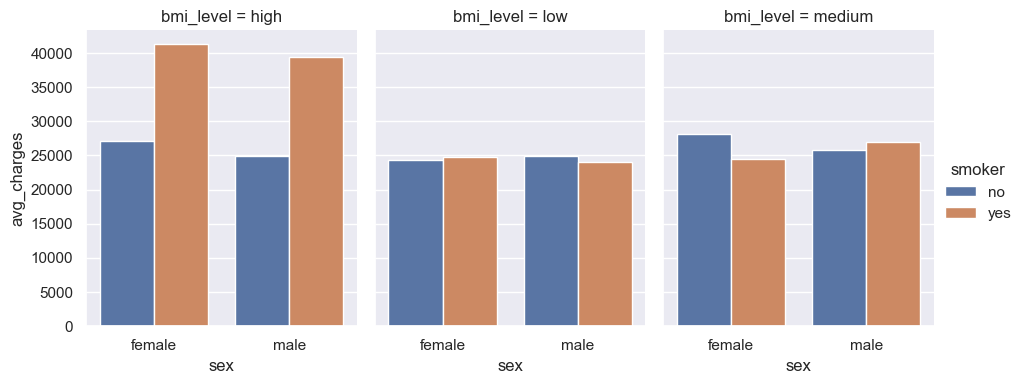

In [49]:
eu.avg_charges_catplot(outliers_result4, outliers=True)

We can see from this plot that when we consider the sex, the bmi level and whether the individual smokes or not, we find that the charges for males and females with low and medium bmi levels have approximately the same average charge. An interesting fact though is that of this group, the average charge for female non smokers is the highest.

Another obvious inference from this plot is that the highest average charges are associated with male and female smokers that have high bmi levels. We cann also see that the average charges female and male non-smokers are almost the same.

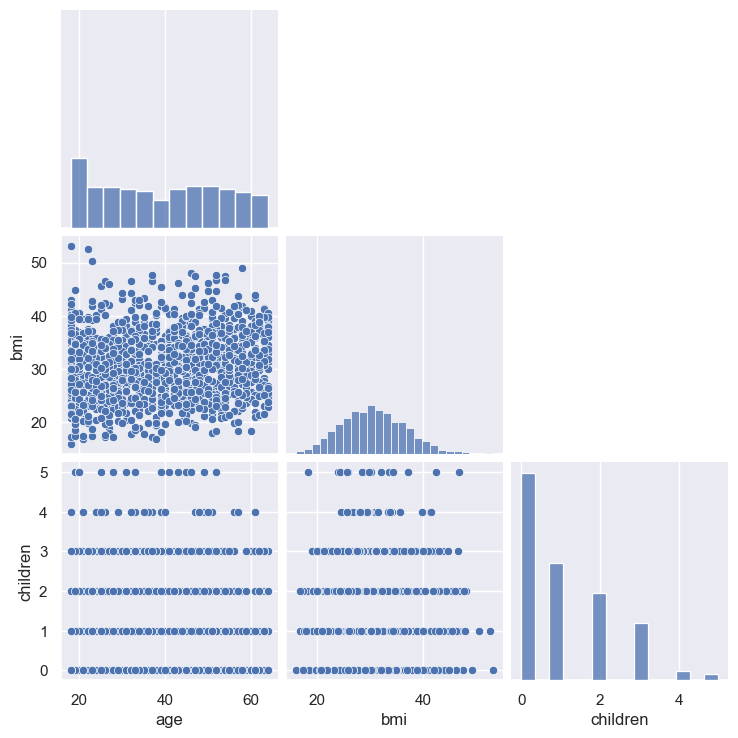

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data=data.drop(['charges'],axis=1),corner=True)
plt.show()

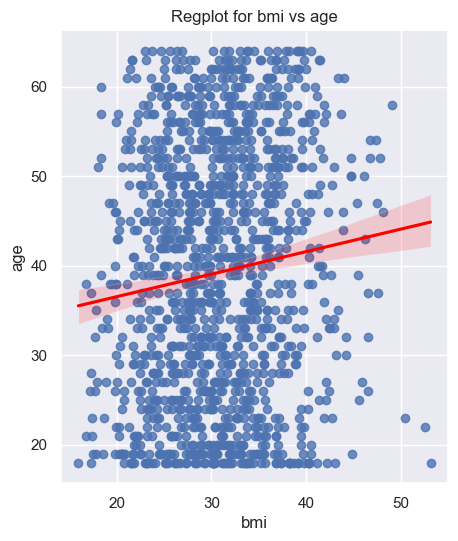

In [51]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x='bmi',y='age',data=data, line_kws={'color': 'red'}, ax=ax)
plt.title('Regplot for bmi vs age')
plt.show()

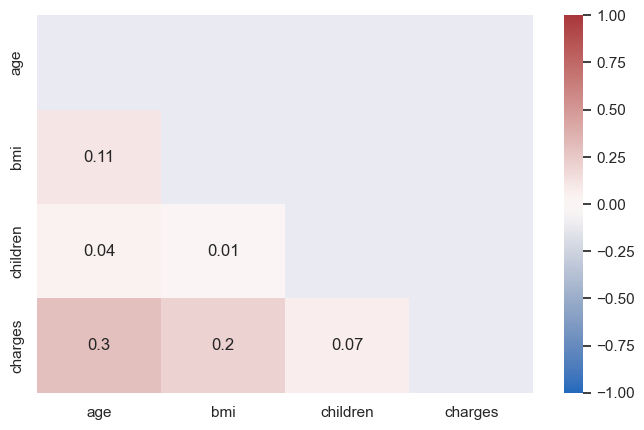

In [52]:
import numpy as np
corr_matrix = data.corr().round(2)
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
# plt.savefig('images/Correlation_features.png')
plt.show()

In [53]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def select_categorical_feature(data, feature, label):
    '''
    Uses the chi2 value to establish correlation of categorical features with the target label
    '''
    cross_tab_result = pd.crosstab(index=data[feature], columns=data[label])
    stat, _, dof, _ = chi2_contingency(cross_tab_result)
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        result = f'{feature} is dependent of {label}, reject H0'
    else:
        result = f'{feature} is independent of {label}, fail to reject H0'
    return result

print(select_categorical_feature(data, 'smoker', 'charges'))
print(select_categorical_feature(data, 'sex', 'charges'))
print(select_categorical_feature(data, 'bmi_level', 'charges'))

smoker is independent of charges, fail to reject H0
sex is independent of charges, fail to reject H0
bmi_level is independent of charges, fail to reject H0
